In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
from os import listdir
from datetime import datetime
import datetime as dt
import dateutil.parser
import matplotlib.pyplot as plt

from sklearn import preprocessing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = listdir('drive/MyDrive/Networkrail_(Delays)_2021-2022')
print(path)
path = ['drive/MyDrive/Networkrail_(Delays)_2021-2022' + p for p in path]
print("\n" + str(len(path)) + " files")

['Delays', 'Glossary']

2 files


In [ ]:
path = listdir('drive/MyDrive/Networkrail_(Delays)_2021-2022/Delays/')
print(path)
path = ['drive/MyDrive/Networkrail_(Delays)_2021-2022/Delays/' + p for p in path]
print("\n" + str(len(path)) + " files")

['Transparency page 202122_P11.xlsx', 'Transparency page 202122_P12.xlsx', 'Transparency page 202122_P13.xlsx', 'All_delays_2021-22_P1.csv', 'All_delays_2021-22_P2.csv', 'All_delays_2021-22_P3.csv', 'All_delays_2021-22_P4.csv', 'All_delays_2021-22_P6.csv', 'All_delays_2021-22_P7.csv', 'All_delays_2021-22_P8.csv', 'All_delays_2021-22_P9.csv', 'All_delays_2021-22_P10.csv', 'All_delays_2021-22_P5.csv', 'All-delays-2020-21-P12.csv', 'All-delays-2020-21-P13.csv', 'All-delays-2020-21-P11.csv']

16 files


In [ ]:
gpath = listdir('drive/MyDrive/Networkrail_(Delays)_2021-2022/Glossary/')
print(gpath)
gpath = ['drive/MyDrive/Networkrail_(Delays)_2021-2022/Glossary/' + p for p in gpath]

['Stanox_Codes.csv', 'Incident_Reason.csv', 'Responsible_Manager.csv', 'Reactionary_Reason.csv', 'Performance_Event.csv', 'Service_Group.csv', 'Operator.csv', 'Train_Service.csv']


In [ ]:
Masterframe3 = 0

print(" Getting data: \n")
T = datetime.timestamp(datetime.now())

for i in range(0,len(path)):
    print(" ‣ File " + str("%02d" % (i+1,)), end = ' ')
    tempdf = pd.read_csv(path[i], low_memory=False, parse_dates=["ORIGIN_DEPARTURE_DATE"], date_parser=lambda x: pd.to_datetime(x, errors="coerce"))
    
    tempdf = tempdf[['ORIGIN_DEPARTURE_DATE', 'INCIDENT_REASON']]
    tempdf = tempdf.dropna()    

    daily = tempdf.copy()
    daily['COUNT'] = daily.groupby(['ORIGIN_DEPARTURE_DATE', 'INCIDENT_REASON'])['INCIDENT_REASON'].transform('count')
    daily = daily.drop_duplicates(subset=['ORIGIN_DEPARTURE_DATE', 'INCIDENT_REASON', 'COUNT'])
    monthly = daily.copy()
    monthly['MONTH'] = [dateutil.parser.parse(str(X)).date().strftime('%m') for X in monthly['ORIGIN_DEPARTURE_DATE']]
    monthly['COUNT'] = monthly.groupby(['MONTH', 'INCIDENT_REASON'])['COUNT'].transform('sum')
    tempdf = monthly

    if(i == 0): Masterframe3 = tempdf.copy()
    else: 
      Masterframe3 = Masterframe3.append(tempdf.copy())

T = datetime.timestamp(datetime.now()) - T
print("\n\n Completed ~" + str(round(T,1)) + "s")

Masterframe3['COUNT'] = Masterframe3.groupby(['MONTH', 'INCIDENT_REASON'])['COUNT'].transform('sum')

 Getting data: 

 ‣ File 01  ‣ File 02  ‣ File 03  ‣ File 04  ‣ File 05  ‣ File 06  ‣ File 07  ‣ File 08  ‣ File 09  ‣ File 10  ‣ File 11  ‣ File 12  ‣ File 13  ‣ File 14  ‣ File 15  ‣ File 16 

 Completed ~92.9s


In [ ]:
M3 = Masterframe3.copy()
M3 = M3.drop(['ORIGIN_DEPARTURE_DATE'], axis=1)
M3 = M3.drop_duplicates(subset=['MONTH', 'INCIDENT_REASON', 'COUNT'])
M3.head()

,INCIDENT_REASON,COUNT,MONTH
0,TN,756,01
1,IR,323255,01
3,M8,182384,01
4,ZU,127482,01
6,IS,439050,01


In [ ]:
M3['MONTH'].value_counts().rename_axis('MONTH').reset_index(name='COUNT')

,MONTH,COUNT
0,02,223
1,03,222
2,01,216
3,10,211
4,12,210
5,11,209
6,09,208
7,04,206
8,07,205
9,05,203


In [ ]:
gpath = '/content/drive/MyDrive/Networkrail_(Delays)_2021-2022/Glossary/Incident_Reason.csv'
stan = pd.read_csv(gpath, encoding = "ISO-8859-1").astype({"Incident Reason": str}) 
df = stan[['Incident JPIP Category', 'Incident Reason']]
#df = df.rename(columns = {'CRS CODE':'crsCode'})
df = df.rename(columns = {'Incident Reason':'INCIDENT_REASON'})
df = df.rename(columns = {'Incident JPIP Category':'INCIDENT_CATEGORY'})
df.head()

,INCIDENT_CATEGORY,INCIDENT_REASON
0,Non-Track Assets,IB
1,Non-Track Assets,IP
2,Non-Track Assets,JT
3,Network Management / Other,IQ
4,Non-Track Assets,ID


In [ ]:
df = pd.merge(df, M3, on="INCIDENT_REASON", how = 'outer')

df.head()

,INCIDENT_CATEGORY,INCIDENT_REASON,COUNT,MONTH
0,Non-Track Assets,IB,171194.0,01
1,Non-Track Assets,IB,176897.0,02
2,Non-Track Assets,IB,288680.0,03
3,Non-Track Assets,IB,152970.0,04
4,Non-Track Assets,IB,157656.0,05


In [ ]:
cross_tab_prop = pd.crosstab(index=df['MONTH'],
                             columns=df['INCIDENT_CATEGORY'],
                             normalize="index")
cross_tab_prop

INCIDENT_CATEGORY,External,Fleet,Network Management / Other,Non-Track Assets,Operations,"Severe Weather, Autumn & Structures",Stations,TOC Other,Track,Traincrew
MONTH,,,,,,,,,,
01,0.078704,0.092593,0.199074,0.111111,0.111111,0.078704,0.120370,0.125000,0.027778,0.055556
02,0.076233,0.089686,0.201794,0.107623,0.112108,0.085202,0.125561,0.121076,0.026906,0.053812
03,0.081081,0.090090,0.198198,0.108108,0.117117,0.081081,0.121622,0.117117,0.027027,0.058559
04,0.082524,0.092233,0.203883,0.111650,0.111650,0.058252,0.126214,0.126214,0.029126,0.058252
05,0.073892,0.098522,0.177340,0.108374,0.123153,0.068966,0.137931,0.123153,0.029557,0.059113
06,0.074627,0.099502,0.203980,0.109453,0.114428,0.054726,0.134328,0.124378,0.029851,0.054726
07,0.073171,0.097561,0.195122,0.107317,0.117073,0.063415,0.126829,0.126829,0.029268,0.063415
08,0.074627,0.099502,0.199005,0.109453,0.124378,0.054726,0.134328,0.119403,0.029851,0.054726
09,0.072115,0.096154,0.192308,0.105769,0.120192,0.067308,0.134615,0.129808,0.028846,0.052885


In [ ]:
cross_tab = pd.crosstab(index=df['MONTH'],
                        columns=df['INCIDENT_CATEGORY'])
cross_tab

INCIDENT_CATEGORY,External,Fleet,Network Management / Other,Non-Track Assets,Operations,"Severe Weather, Autumn & Structures",Stations,TOC Other,Track,Traincrew
MONTH,,,,,,,,,,
01,17,20,43,24,24,17,26,27,6,12
02,17,20,45,24,25,19,28,27,6,12
03,18,20,44,24,26,18,27,26,6,13
04,17,19,42,23,23,12,26,26,6,12
05,15,20,36,22,25,14,28,25,6,12
06,15,20,41,22,23,11,27,25,6,11
07,15,20,40,22,24,13,26,26,6,13
08,15,20,40,22,25,11,27,24,6,11
09,15,20,40,22,25,14,28,27,6,11


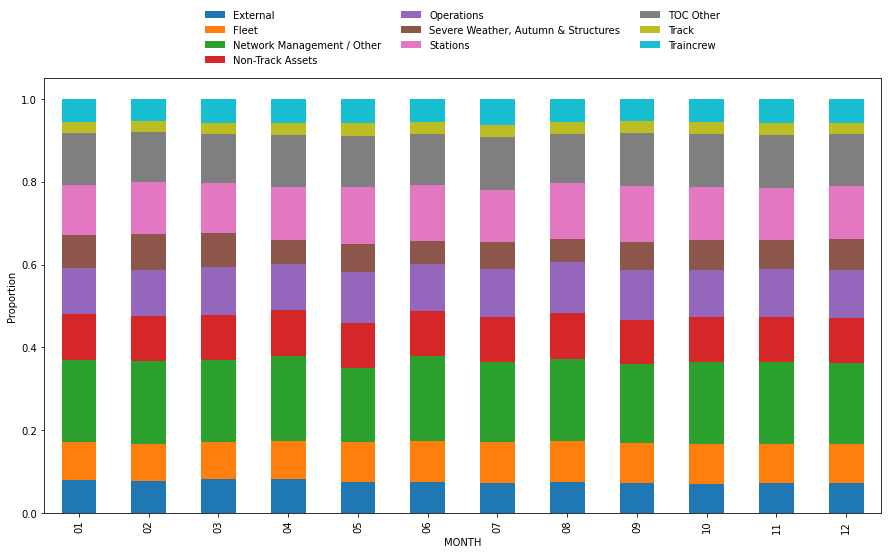

In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 8))

#plt.legend(loc="upper left", ncol=10)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
plt.xlabel("MONTH")
plt.ylabel("Proportion")
plt.show()

In [ ]:
cross_tab_prop = pd.crosstab(index=df['MONTH'],
                             columns=df['INCIDENT_REASON'],
                             normalize="index")
cross_tab_prop

INCIDENT_REASON,AA,AC,AD,AE,AG,AH,AJ,AK,AX,AZ,...,XT,XU,XV,XW,ZS,ZU,ZW,ZX,ZY,ZZ
MONTH,,,,,,,,,,,,,,,,,,,,,
01,0.004630,0.004630,0.004630,0.004630,0.004630,0.004630,0.004630,0.004630,0.004630,0.004630,...,0.004630,0.004630,0.000000,0.004630,0.004630,0.004630,0.004630,0.000000,0.004630,0.004630
02,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,...,0.004484,0.004484,0.000000,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484
03,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,...,0.000000,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505,0.004505
04,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,...,0.000000,0.004854,0.004854,0.004854,0.004854,0.004854,0.000000,0.004854,0.004854,0.004854
05,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,0.004926,...,0.004926,0.004926,0.000000,0.004926,0.004926,0.004926,0.004926,0.000000,0.004926,0.004926
06,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,0.000000,0.004975,0.000000,0.004975,0.004975,0.004975,0.000000,0.000000,0.004975,0.004975
07,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.000000,0.004878,0.000000,0.004878,0.004878,0.004878,0.000000,0.004878,0.004878,0.004878
08,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,0.000000,0.004975,0.000000,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975
09,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,...,0.000000,0.004808,0.000000,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808


In [ ]:
cross_tab = pd.crosstab(index=df['MONTH'],
                        columns=df['INCIDENT_REASON'])
cross_tab

INCIDENT_REASON,AA,AC,AD,AE,AG,AH,AJ,AK,AX,AZ,...,XT,XU,XV,XW,ZS,ZU,ZW,ZX,ZY,ZZ
MONTH,,,,,,,,,,,,,,,,,,,,,
01,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
02,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
03,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
04,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1
05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
06,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,0,0,1,1
07,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,0,1,1,1
08,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
09,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1


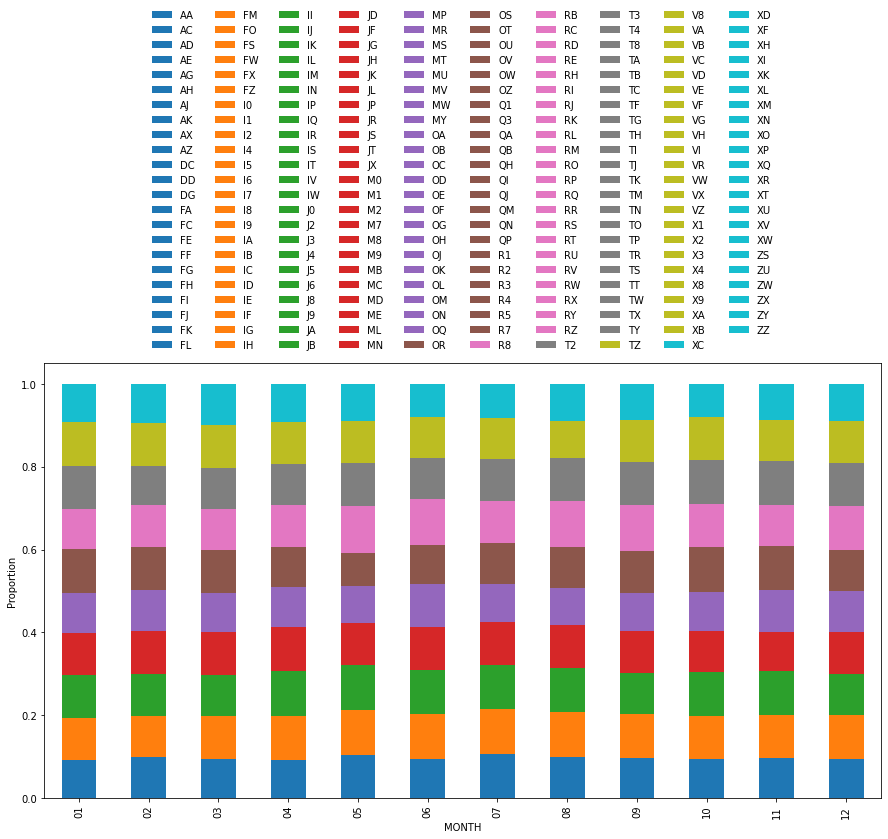

In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(15, 8))

#plt.legend(loc="upper left", ncol=10)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=10,
    )
plt.xlabel("MONTH")
plt.ylabel("Proportion")
plt.show()

In [ ]:
df.groupby('MONTH')['Proportion'].value_counts(normalize=True)
   .unstack('Proportion').plot.bar(stacked=True)